In [26]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Project
## Customer Segmentation EDA Analysis 

In [27]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Mall_Customers_Enhanced.csv")

# Data Info

In [28]:
df.shape

(200, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Age Group               196 non-null    object 
 6   Estimated Savings (k$)  200 non-null    float64
 7   Credit Score            200 non-null    int64  
 8   Loyalty Years           200 non-null    int64  
 9   Preferred Category      200 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 15.8+ KB


In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


# Data handling & cleaning

In [31]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [32]:
df.drop(columns=["CustomerID"],inplace=True)

# EDA & Visualization 

In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,Male,19,15,39,18-25,11.10,456,3,Budget
1,Male,21,15,81,18-25,6.90,300,6,Luxury
2,Female,20,16,6,18-25,15.36,594,2,Budget
3,Female,23,16,77,18-25,7.79,300,6,Luxury
4,Female,31,17,40,26-35,12.47,480,5,Budget


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  200 non-null    object 
 1   Age                     200 non-null    int64  
 2   Annual Income (k$)      200 non-null    int64  
 3   Spending Score (1-100)  200 non-null    int64  
 4   Age Group               196 non-null    object 
 5   Estimated Savings (k$)  200 non-null    float64
 6   Credit Score            200 non-null    int64  
 7   Loyalty Years           200 non-null    int64  
 8   Preferred Category      200 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 14.2+ KB


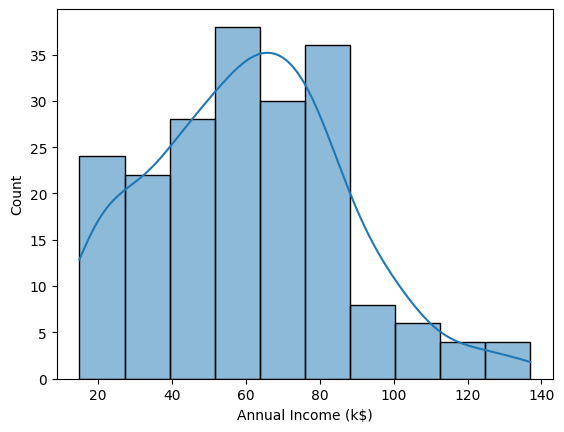

In [35]:
sns.histplot(df['Annual Income (k$)'], kde=True)
px.pie(df, names='Gender', title='Gender Distribution')

In [36]:
px.box(df, x='Preferred Category', y='Loyalty Years', color='Gender')


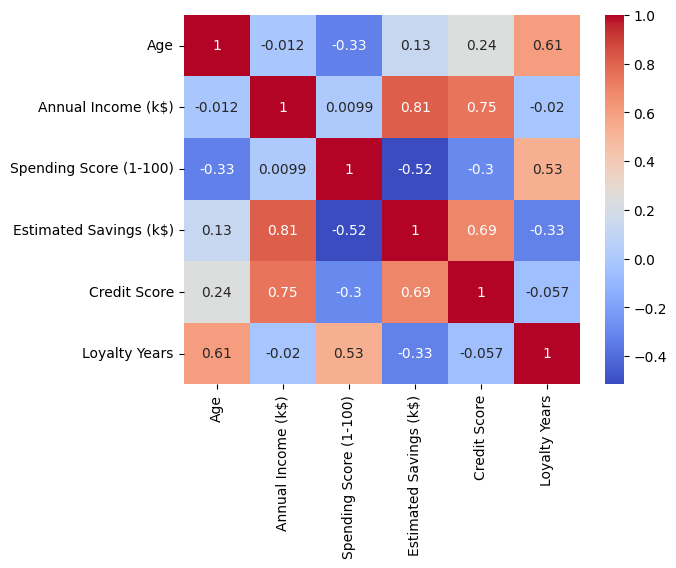

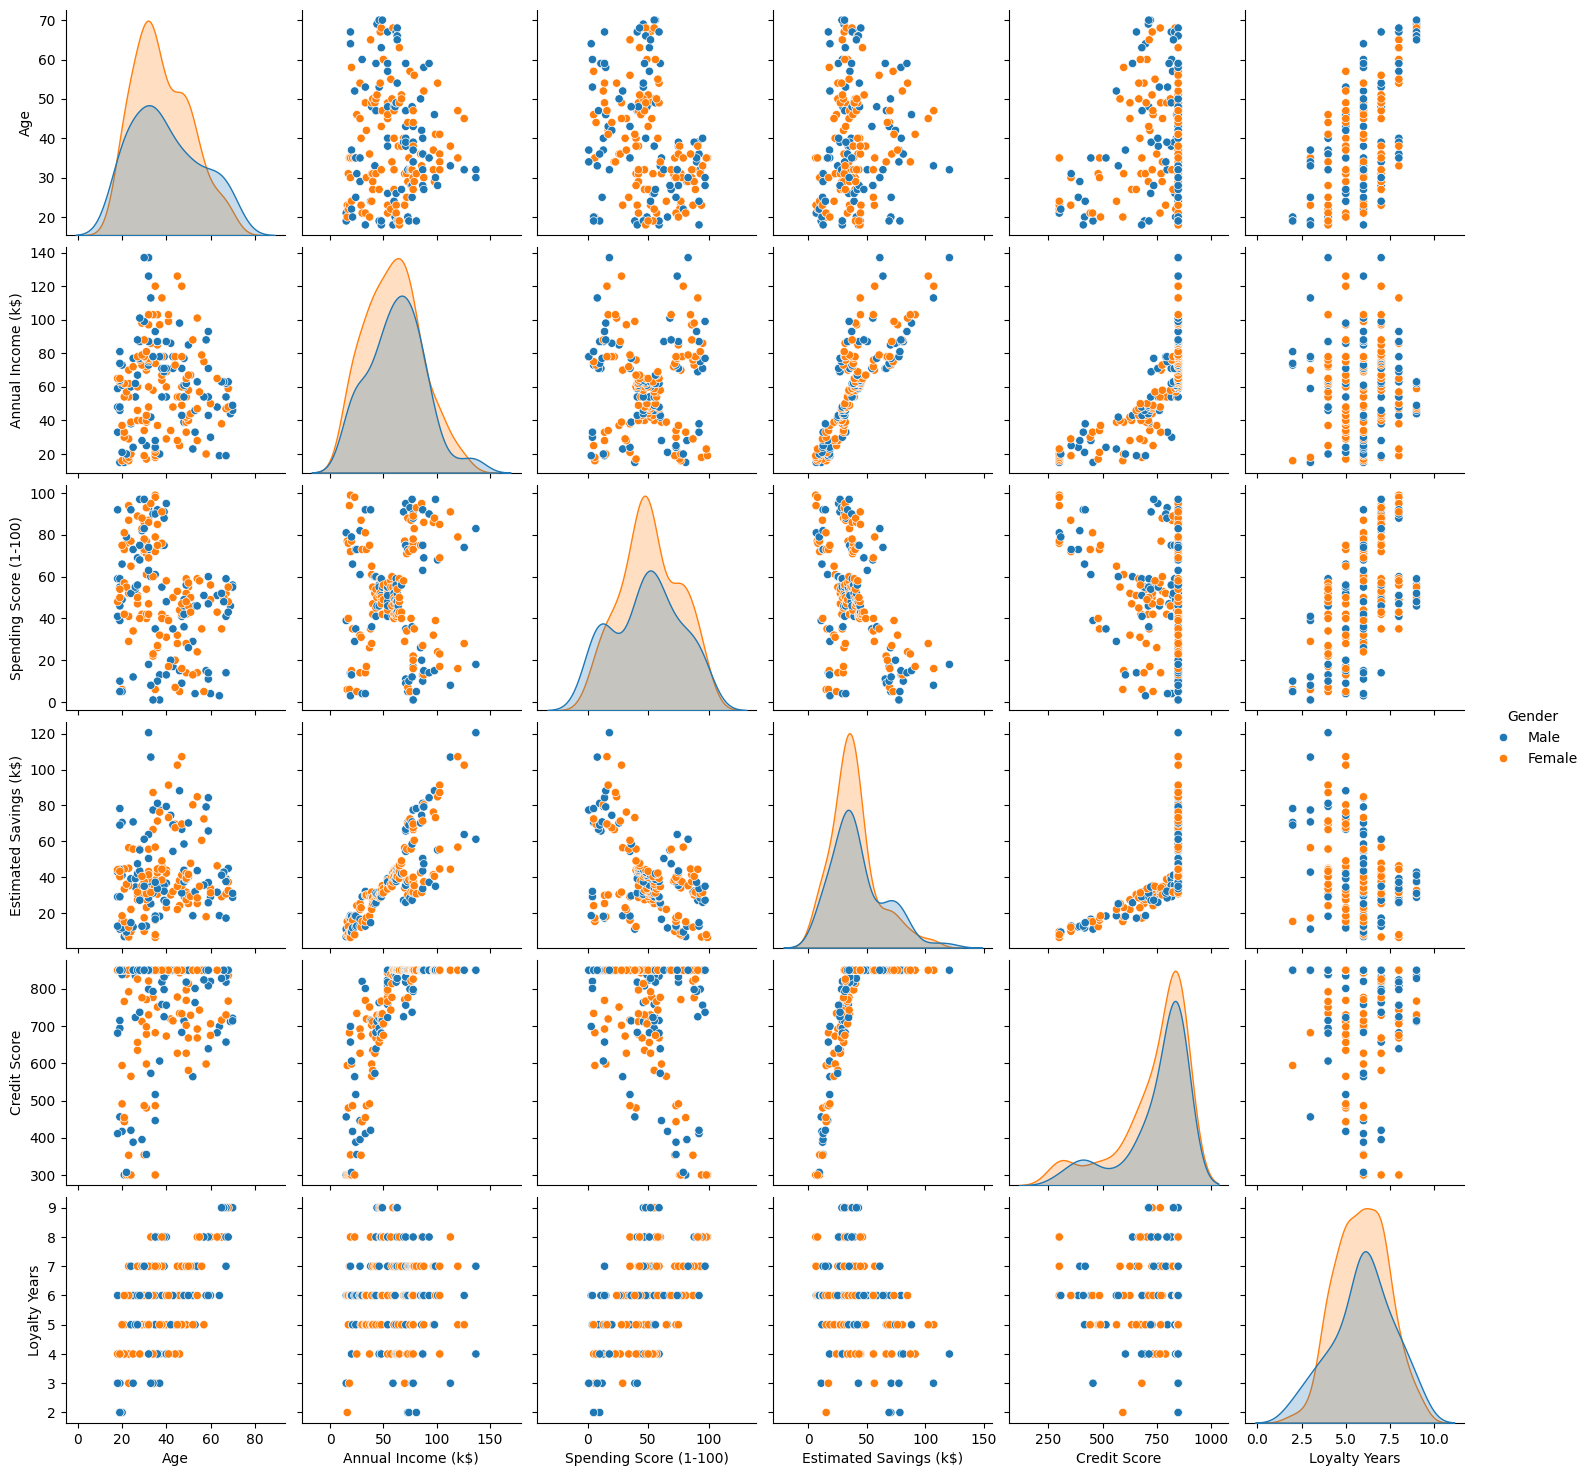

In [37]:
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap='coolwarm')
sns.pairplot(df, hue='Gender')


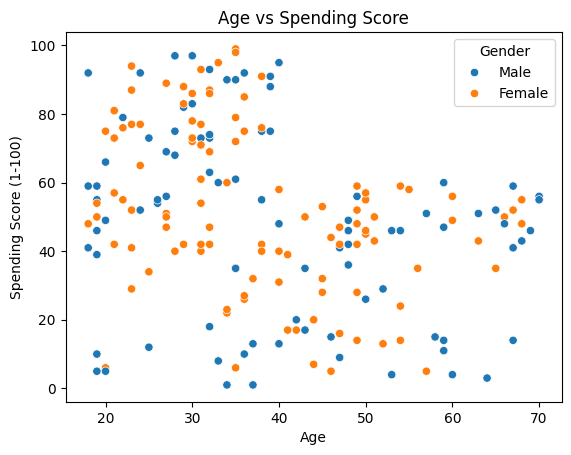

In [38]:
# Age vs Spending Score
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age vs Spending Score')
plt.show()

# Income vs Savings (interactive)
px.scatter(df, x='Annual Income (k$)', y='Estimated Savings (k$)',
           color='Preferred Category', hover_data=['Age', 'Credit Score'],
           title='Income vs Savings by Category')


In [40]:
# Derived metrics
df['Savings to Income Ratio'] = df['Estimated Savings (k$)'] / df['Annual Income (k$)']
df['Loyalty Score'] = df['Loyalty Years'] * df['Spending Score (1-100)']

# Visualize Loyalty Score
px.histogram(df, x='Loyalty Score', nbins=30, color='Age Group',
             title='Loyalty Score Distribution by Age Group')


In [41]:
# Interactive scatter with dropdown
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)',
                 color='Preferred Category', hover_data=['Age', 'Gender', 'Credit Score'],
                 title='Customer Segmentation')

fig.update_layout(
    updatemenus=[{
        'buttons': [
            {'method': 'update',
             'label': 'All',
             'args': [{'visible': [True]*len(df)}]},
            {'method': 'update',
             'label': 'High Income',
             'args': [{'visible': df['Annual Income (k$)'] > 80}]}],
        'direction': 'down',
        'showactive': True
    }]
)
fig.show()


In [42]:
from sklearn.cluster import KMeans
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Loyalty Years']]
kmeans = KMeans(n_clusters=4)
df['Cluster'] = kmeans.fit_predict(features)

px.scatter_3d(df, x='Annual Income (k$)', y='Spending Score (1-100)', z='Loyalty Years',
              color='Cluster', hover_data=['Age', 'Preferred Category'])
